In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [187]:
movieDict = {'movieId':[],'userId':[],'rating':[]}
with open('netflixdata\combined_data_1.txt', 'r') as inFile:
    curMovie = 0
    for line in inFile.readlines():
        if len(line.split(":")) == 2:
            curMovie = int(line.strip(':\n'))
        else:
            splitLine = line.split(",")
            lineVals = [int(splitLine[0].strip()), int(splitLine[1].strip())]
            movieDict['movieId'].append(curMovie)
            movieDict['userId'].append(lineVals[0])
            movieDict['rating'].append(lineVals[1])

In [ ]:
# load in movie data into a dict
movieInfo = {'movieId':[], 'movieYr':[], 'movieNm':[]}
with open('netflixdata\movie_titles.csv', 'r') as movieInd:
    for line in movieInd.readlines():
        curLine = line.split(',')
        if(curLine[1].strip()=='NULL'):
            continue
        formattedLine = [int(curLine[0].strip()), int(curLine[1].strip()), curLine[2].strip()]
        movieInfo['movieId'].append(formattedLine[0])
        movieInfo['movieYr'].append(formattedLine[1])
        movieInfo['movieNm'].append(formattedLine[2])

In [40]:
# Generate dataframe for movieInfo
infoFrame = pd.DataFrame(movieInfo)
del movieInfo

In [8]:
# Generate dataframe for movieSet
movieFrame = pd.DataFrame(movieDict)
del movieDict

In [43]:
joinedFrame = movieFrame.merge(infoFrame, on='movieId')

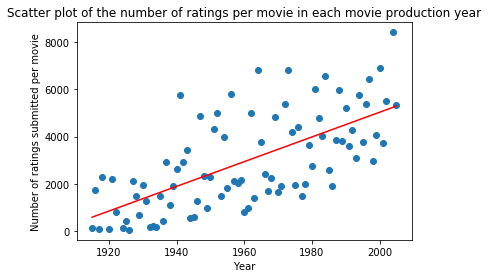

In [231]:
# Number of ratings per movie each year
years = list(joinedFrame['movieYr'].value_counts())[::-1]
numMovies = list(joinedFrame.groupby('movieYr')['movieId'].nunique())
normalized = []
for i in range(len(years)):
    normalized.append(years[i]/numMovies[i])
mean = np.mean(normalized)
std = np.std(normalized)
new_normalized = [x for x in normalized if (x < mean + 3 * std)]
x_axis = list(joinedFrame['movieYr'].unique()[::-1])
x_axis.pop()
plt.scatter(x_axis, new_normalized)
plt.plot(np.unique(x_axis), np.poly1d(np.polyfit(x_axis, new_normalized, 1))(np.unique(x_axis)),color='r')
plt.ylabel("Number of ratings submitted per movie")
plt.xlabel("Year")
plt.title("Scatter plot of the number of ratings per movie in each movie production year")
plt.show()

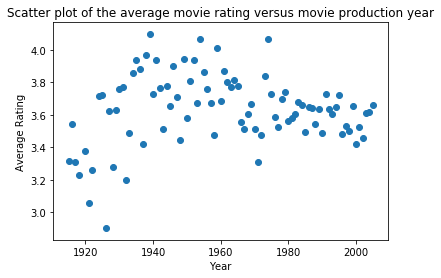

In [233]:
# Average rating of all movies throughout the years
x = joinedFrame.groupby('movieYr').mean().reset_index()['movieYr']
y = joinedFrame.groupby('movieYr').mean().reset_index()['rating']
plt.scatter(x,y)
plt.ylabel("Average Rating")
plt.xlabel("Year")
plt.title("Scatter plot of the average movie rating versus movie production year")
plt.show()

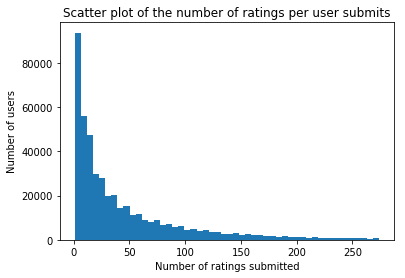

In [201]:
# Number of ratings users submit
values = list(joinedFrame['userId'].value_counts())
std = np.std(values)
mean = np.mean(values)
new_values = [x for x in values if (x < mean + 3 * std)]
plt.hist(new_values,bins=50)
plt.ylabel("Number of users")
plt.xlabel("Number of ratings submitted")
plt.title("Scatter plot of the number of ratings per user submits")
plt.show()
plt.savefig('plt1.png')

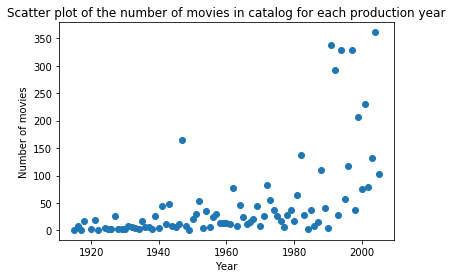

In [191]:
# Number of movies listed on Netflix each year
plt.scatter(joinedFrame['movieYr'].unique()[::-1],
            joinedFrame.groupby('movieYr')['movieId'].nunique())
plt.ylabel("Number of movies")
plt.xlabel("Year")
plt.title("Scatter plot of the number of movies in catalog for each production year")
plt.show()